In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df = df.iloc[:,2:6]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[:,0:2]
Y = df['Purchased']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [6]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [9]:
X_train_scaled  = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [10]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [11]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## Effect of Scaling

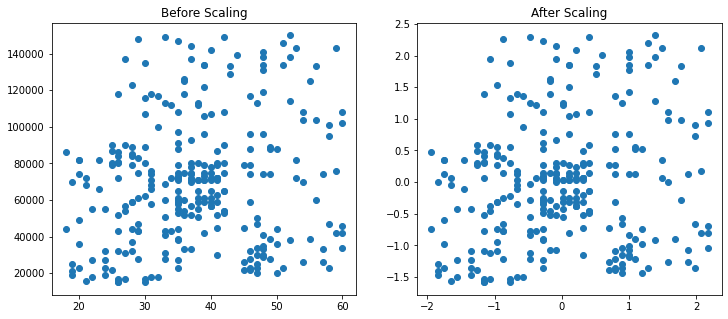

In [12]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()

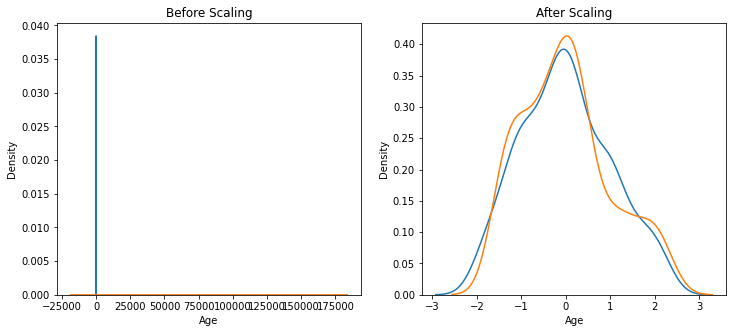

In [13]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

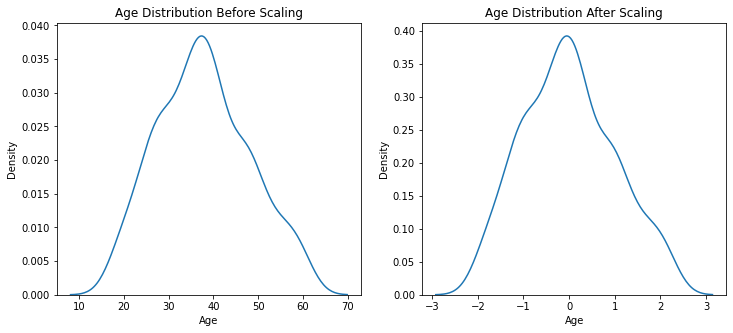

In [14]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

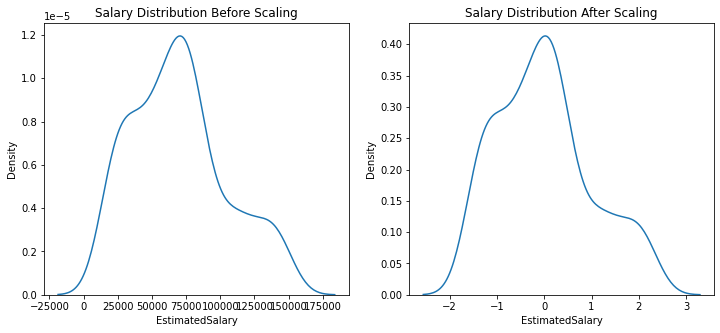

In [15]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title('Salary Distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

## Effect of Scaling on Logistic Regression

In [16]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [17]:
Y_pred = lr.predict(X_test)
Y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [18]:
print("Accuracy before scaling : ",accuracy_score(Y_test,Y_pred))
print("Accuracy after scaling : ",accuracy_score(Y_test,Y_pred_scaled))

Accuracy before scaling :  0.6583333333333333
Accuracy after scaling :  0.8666666666666667


## Effect of scaling on Decision Tree Classifier

In [19]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [20]:
Y_pred = dt.predict(X_test)
Y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [21]:
print("Accuracy before scaling : ",accuracy_score(Y_test,Y_pred))
print("Accuracy after scaling : ",accuracy_score(Y_test,Y_pred_scaled))

Accuracy before scaling :  0.8666666666666667
Accuracy after scaling :  0.8666666666666667


## Effect of Outlier

In [22]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,3500000],'Purchased':[0,1,1]}),ignore_index=True)

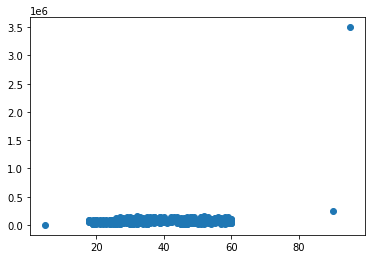

In [23]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((282, 2), (121, 2))

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train_scaled  = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,columns=X_test.columns)

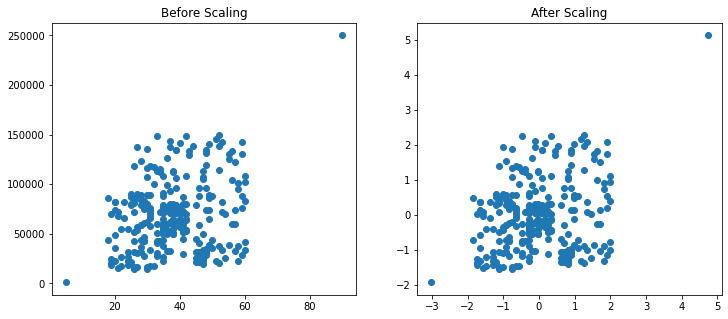

In [27]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'])
ax2.set_title('After Scaling')
plt.show()